In [8]:
import matplotlib.pyplot as plt
import json
import os

dirs = [
        # 'out/contrastive_experiments_holdout0/luke-base_contrastive-tmp-0.01_new-lr5e5_inprojnorm-plotnorm',
        # 'out/holdout-batch-0/luke-base_contrastive-tmp-0.01_new-lr5e5_inprojnorm-plotnorm-onlysup',
        # 'out/holdout-batch-0/luke-base_contrastive-tmp-0.01_new-lr5e5_inprojnorm-plotnorm-onlyunsup',
        # 'out/contrastive_experiments_holdout0/luke-base_contrastive-tmp-0.01_new-lr5e5_inprojnorm-plotraw',
        # 'out/contrastive_experiments_holdout0/luke-base_contrastive-tmp-0.01_new-lr5e5_inprojraw-plotraw',
        # 'out/contrastive_experiments_holdout0/luke-base_contrastive-tmp-0.01_new-lr5e5_inprojraw-plotnorm',
        'out/holdout-batch-0/luke-base_contr_tmp-0.01_supw-0.5_norm-True'
        ]

stats_dict = {}
for d in dirs:
    with open(os.path.join(d, 'stats', 'stats.json')) as f:
        tmp_stats = json.load(f)
        stats = {}
        for key in tmp_stats[0].keys():
            if isinstance(tmp_stats[0][key], dict):
                stats[key] = {}
                for k in tmp_stats[0][key].keys():
                    stats[key][k] = [s[key][k] for s in tmp_stats]
            else:
                stats[key] = [s[key] for s in tmp_stats]
        stats_dict[d.split('/')[-1]] = stats

run_keys = stats_dict.keys()
stat_keys = stats_dict[list(stats_dict.keys())[0]].keys()
print(run_keys)
print(stat_keys)

dict_keys(['luke-base_contr_tmp-0.01_supw-0.5_norm-True'])
dict_keys(['pos_neg_sim', 'holdout_cand_ratio', 'holdout_cand_count', 'holdout_count', 'ratio_all_cand_holdout', 'neg_cand_ratio', 'neg_cand_count', 'neg_count', 'ratio_all_cand_neg', 'per_class_retain', 'losses', 'epoch'])


In [9]:
print(stats_dict)

{'luke-base_contr_tmp-0.01_supw-0.5_norm-True': {'pos_neg_sim': [0.9680593013763428, 0.9640903472900391, 0.9589289426803589, 0.940390408039093, 0.9133275747299194, 0.8979787230491638, 0.8721445798873901, 0.8209569454193115, 0.8014920353889465, 0.7934781312942505, 0.7264436483383179, 0.6579532623291016, 0.6958319544792175], 'holdout_cand_ratio': [0.7580706418533991, 0.810102544625902, 0.8716293201671098, 0.8515001898974554, 0.8606152677554121, 0.8963159893657425, 0.9149259399924041, 0.9099886061526775, 0.8526395746297, 0.9415115837447778, 0.8826433725788074, 0.8336498290922901, 0.8526395746297], 'holdout_cand_count': [1996, 2133, 2295, 2242, 2266, 2360, 2409, 2396, 2245, 2479, 2324, 2195, 2245], 'holdout_count': [2633, 2633, 2633, 2633, 2633, 2633, 2633, 2633, 2633, 2633, 2633, 2633, 2633], 'ratio_all_cand_holdout': [0.0034438790915474853, 0.0038645014829322383, 0.004291853519693904, 0.004327157837038695, 0.004561136540218919, 0.004913677512846352, 0.005043653036869543, 0.00521795184501

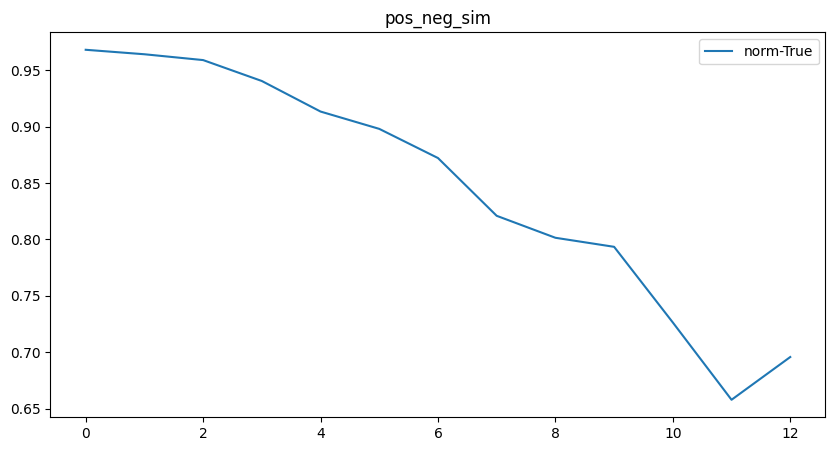

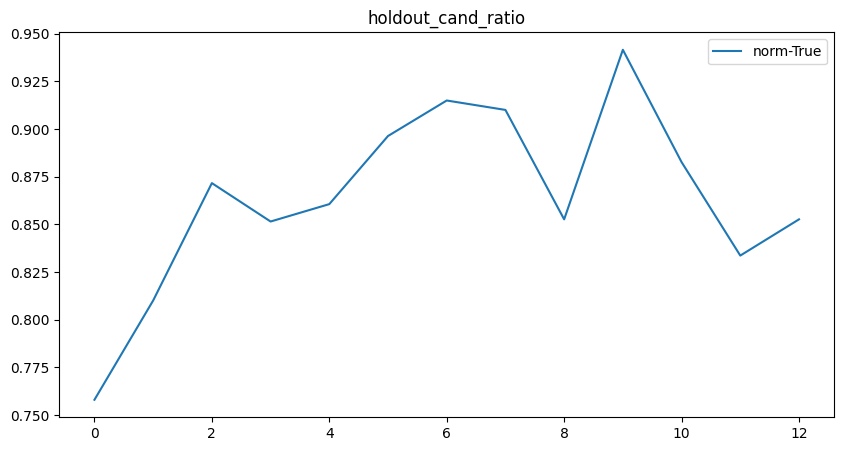

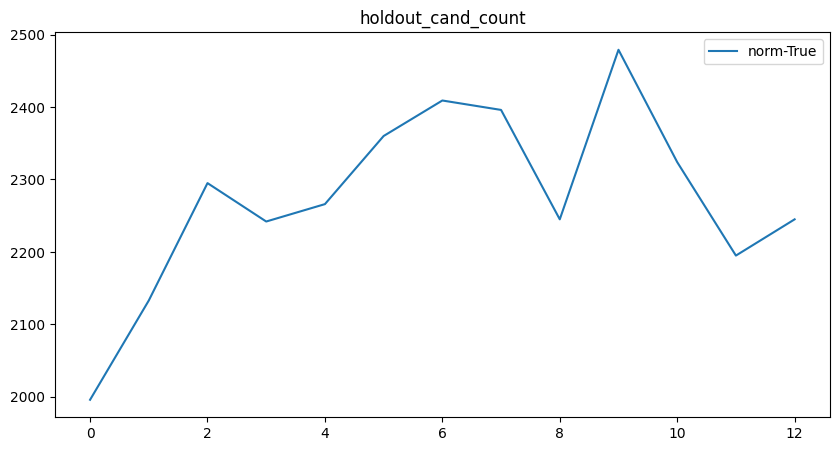

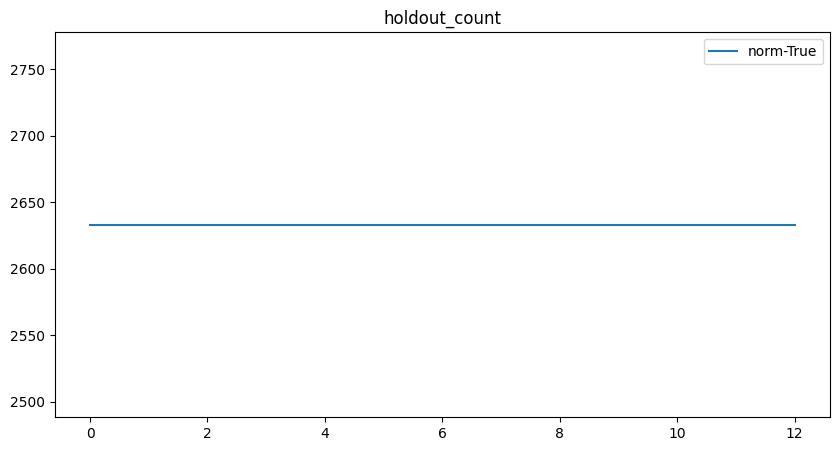

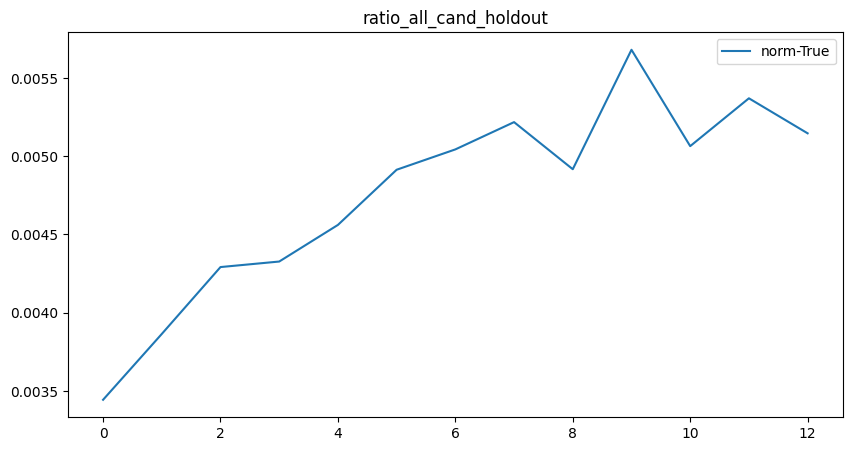

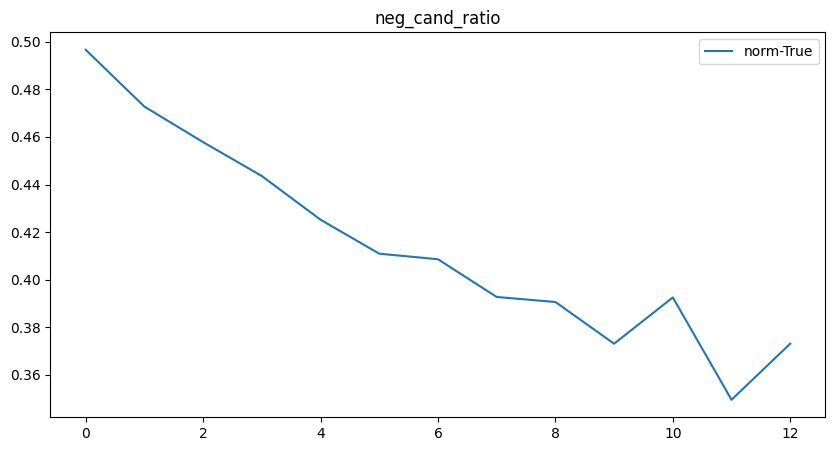

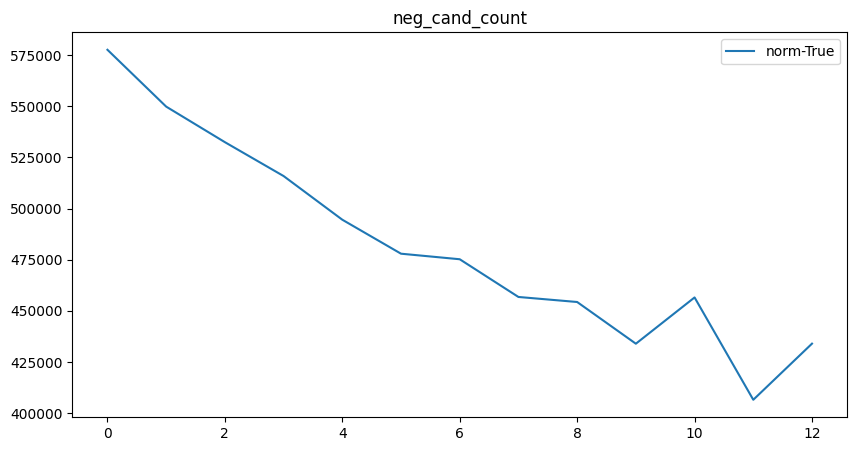

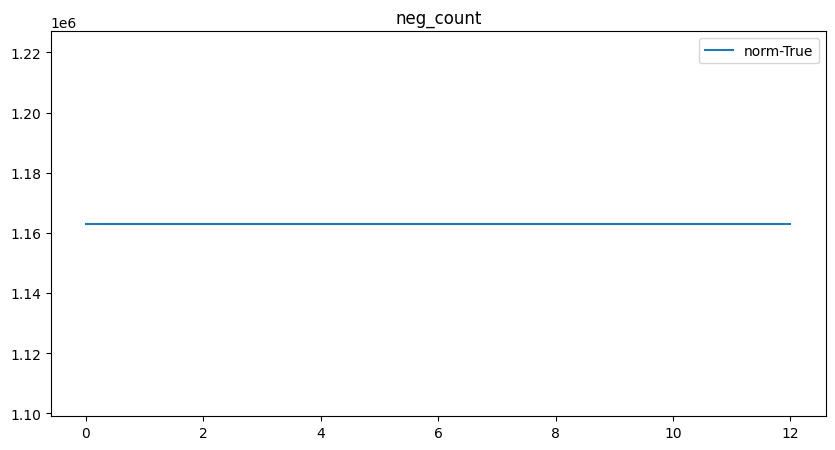

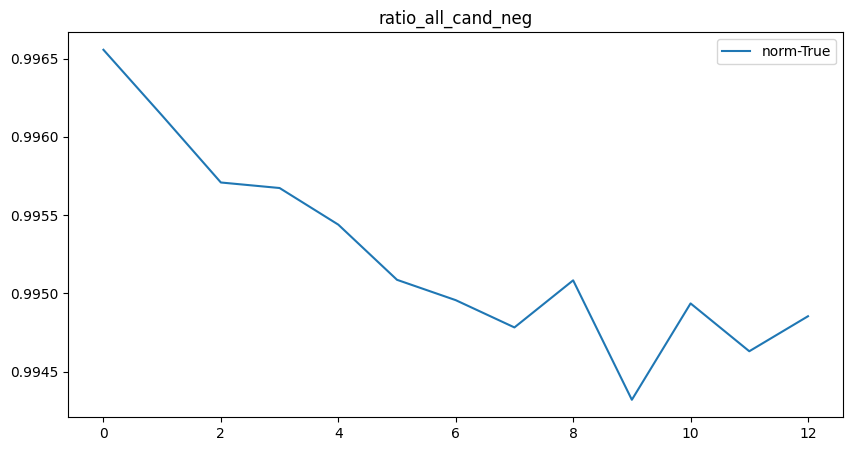

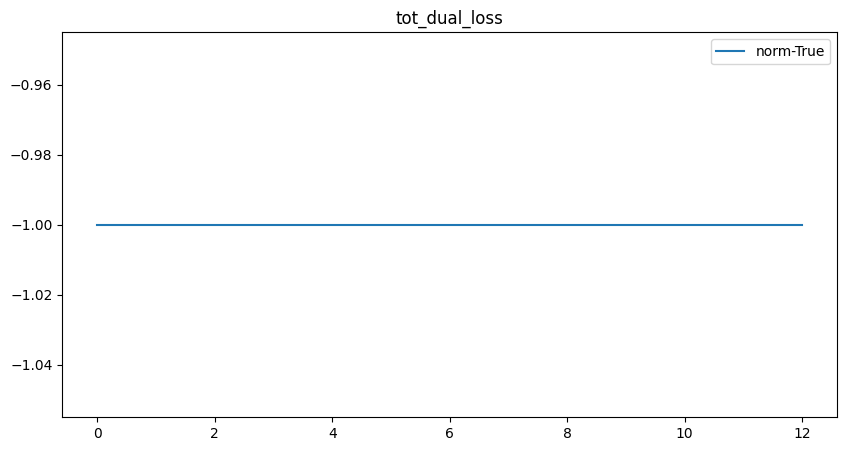

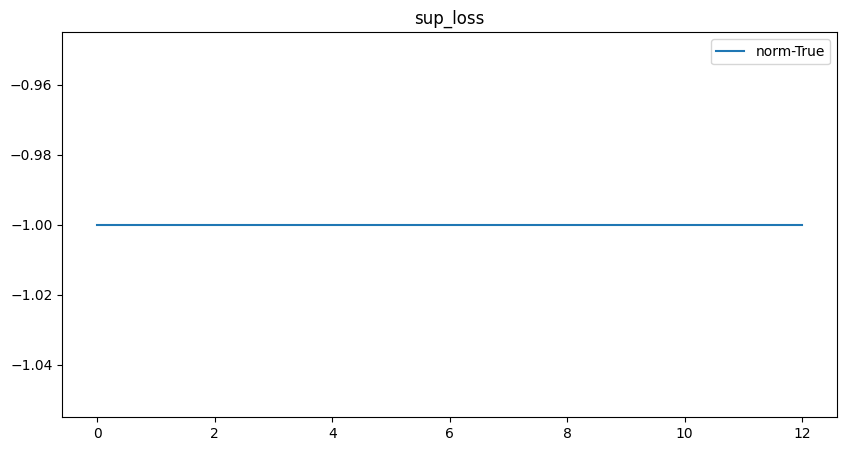

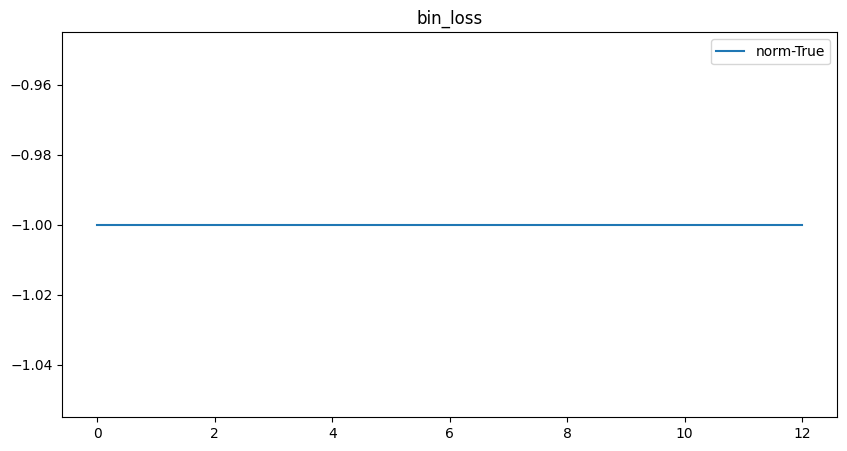

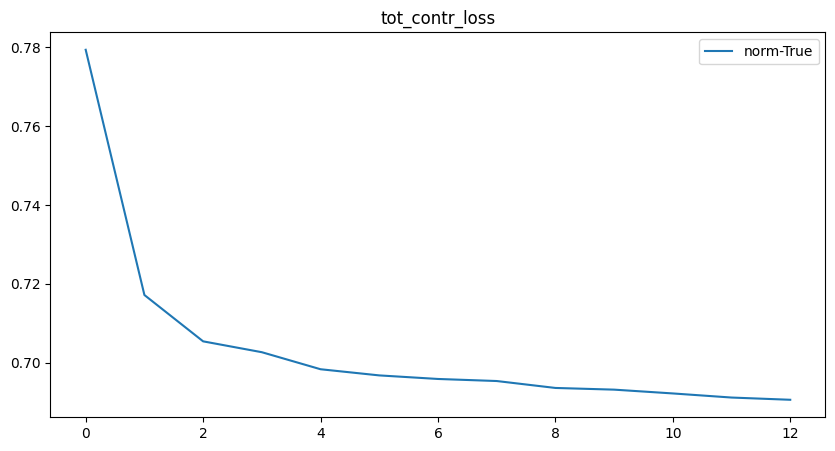

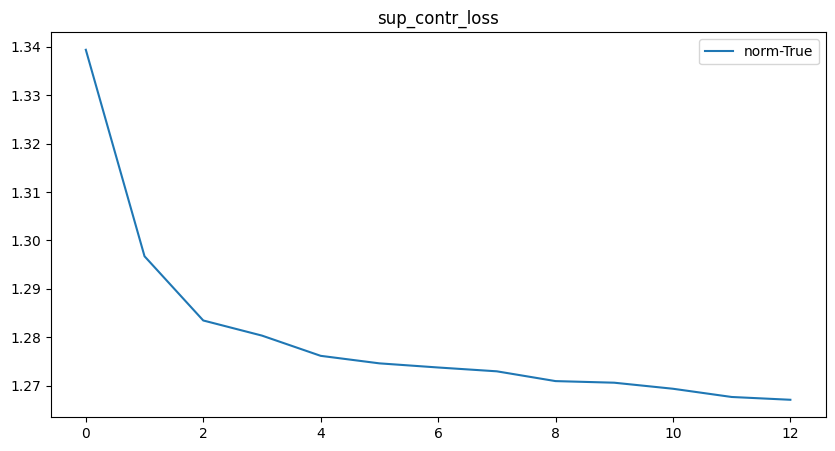

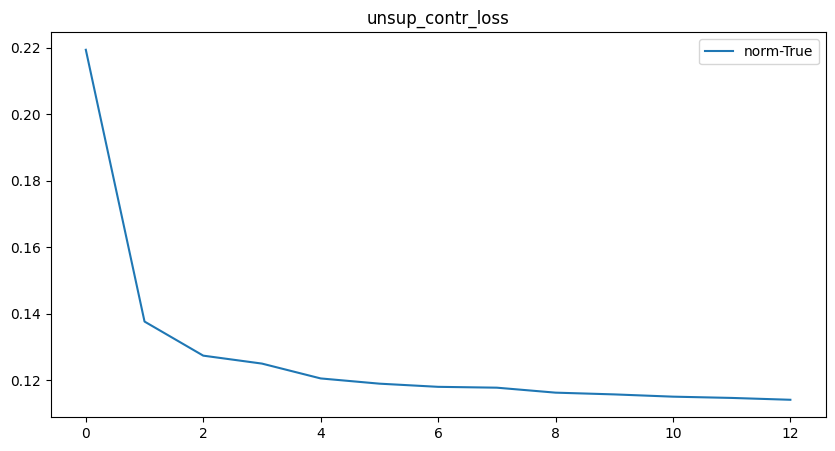

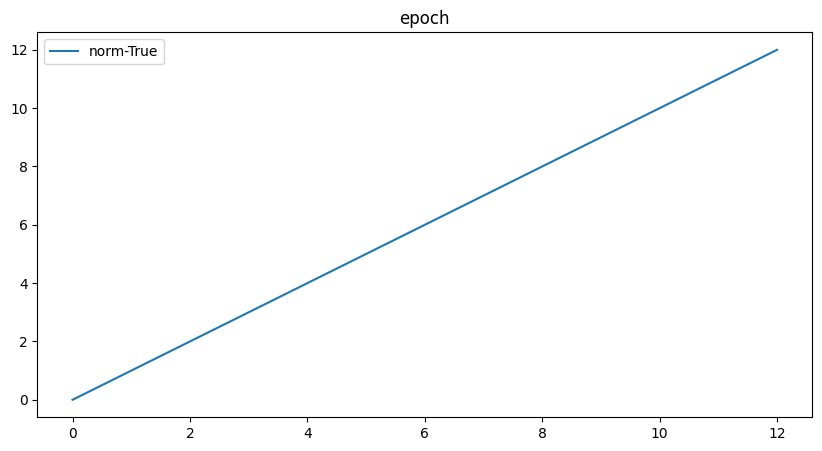

In [10]:
"""
- training on normalized embeddings into projection head and then plotting with raw embeddings seems to perform better than plotting with normalized embeddings?
- raw embeddings in projection input seems to have a faster increase in performance but then performance begins to degrade
- Have to determine a stopping metric, how do we know when performance is degrading when we dont know the holdouts?
    - Maybe when negative candidate count begins to increase after decreasing?
    - Do losses have any insight? TODO: plot this
- normalized input to projection head seems to be the most stable outcome
"""

for stat in stat_keys:
    if stat in set(['per_class_retain']): # Stats to ignore
        continue

    if stat == 'losses':
        for sub_stat in stats_dict[list(stats_dict.keys())[0]][stat].keys():
            plt.figure(figsize=(10, 5))
            plt.title(sub_stat)
            for k, v in stats_dict.items():
                plt.plot(v[stat][sub_stat], label=k.split('_')[-1])
            plt.legend()
            plt.show()
    else:
        plt.figure(figsize=(10, 5))
        plt.title(stat)
        for k, v in stats_dict.items():
            plt.plot(v[stat], label=k.split('_')[-1])
        plt.legend()
        plt.show()